In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score

In [79]:
employee_burnout = pd.read_csv('/content/EmployeeBurnout1 (1).csv')

In [80]:
employee_burnout.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/2008,Female,Service,No,3,7.0,6.9,0.52


In [81]:
employee_burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  int64  
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.6+ MB


In [82]:
employee_burnout.isna().any()

Employee ID             False
Date of Joining         False
Gender                  False
Company Type            False
WFH Setup Available     False
Designation             False
Resource Allocation      True
Mental Fatigue Score     True
Burn Rate                True
dtype: bool

In [83]:
employee_burnout.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

# solve missing value problem

In [84]:
employee_burnout['Resource Allocation'].fillna(employee_burnout['Resource Allocation'].mean(),inplace=True)

In [85]:
employee_burnout['Mental Fatigue Score'].fillna(employee_burnout['Mental Fatigue Score'].median(),inplace = True)

In [86]:
employee_burnout['Burn Rate'].fillna(employee_burnout['Burn Rate'].mean(),inplace = True)

In [87]:
employee_burnout.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

# Encoding Categorical Data

In [88]:
employee_burnout.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [89]:
employee_burnout['Date of Joining'] = pd.to_datetime(employee_burnout['Date of Joining'])

In [90]:
employee_burnout['Year'] = employee_burnout['Date of Joining'].dt.year

In [91]:
employee_burnout['month'] = employee_burnout['Date of Joining'].dt.month

In [92]:
employee_burnout['day'] = employee_burnout['Date of Joining'].dt.day

In [93]:
employee_burnout.drop(['Date of Joining'],axis=1,inplace=True)

In [94]:
employee_burnout.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day
0,fffe32003000360033003200,Female,Service,No,2,3.000000,3.8,0.16,2008,9,30
1,fffe3700360033003500,Male,Service,Yes,1,2.000000,5.0,0.36,2008,11,30
2,fffe31003300320037003900,Female,Product,Yes,2,4.481398,5.8,0.49,2008,3,10
3,fffe32003400380032003900,Male,Service,Yes,1,1.000000,2.6,0.20,2008,11,3
4,fffe31003900340031003600,Female,Service,No,3,7.000000,6.9,0.52,2008,7,24


In [95]:
employee_burnout['Year'].unique()

array([2008])

In [96]:
dummy =pd.get_dummies(employee_burnout['Gender'])
dummy.head()

,Female,Male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [97]:
employee_burnout = pd.concat([employee_burnout,dummy],axis=1)
employee_burnout.drop(['Gender'],axis=1,inplace=True)
employee_burnout.head()

,Employee ID,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day,Female,Male
0,fffe32003000360033003200,Service,No,2,3.000000,3.8,0.16,2008,9,30,1,0
1,fffe3700360033003500,Service,Yes,1,2.000000,5.0,0.36,2008,11,30,0,1
2,fffe31003300320037003900,Product,Yes,2,4.481398,5.8,0.49,2008,3,10,1,0
3,fffe32003400380032003900,Service,Yes,1,1.000000,2.6,0.20,2008,11,3,0,1
4,fffe31003900340031003600,Service,No,3,7.000000,6.9,0.52,2008,7,24,1,0


In [98]:
dummy =pd.get_dummies(employee_burnout['Company Type'])
dummy.head()

,Product,Service
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [99]:
employee_burnout = pd.concat([employee_burnout,dummy],axis=1)
employee_burnout.drop(['Company Type'],axis=1,inplace=True)
employee_burnout.head()

,Employee ID,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day,Female,Male,Product,Service
0,fffe32003000360033003200,No,2,3.000000,3.8,0.16,2008,9,30,1,0,0,1
1,fffe3700360033003500,Yes,1,2.000000,5.0,0.36,2008,11,30,0,1,0,1
2,fffe31003300320037003900,Yes,2,4.481398,5.8,0.49,2008,3,10,1,0,1,0
3,fffe32003400380032003900,Yes,1,1.000000,2.6,0.20,2008,11,3,0,1,0,1
4,fffe31003900340031003600,No,3,7.000000,6.9,0.52,2008,7,24,1,0,0,1


In [100]:
dummy =pd.get_dummies(employee_burnout['WFH Setup Available'])
dummy.head()

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [101]:
employee_burnout = pd.concat([employee_burnout,dummy],axis=1)
employee_burnout.drop(['WFH Setup Available'],axis=1,inplace=True)
employee_burnout.head()

,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day,Female,Male,Product,Service,No,Yes
0,fffe32003000360033003200,2,3.000000,3.8,0.16,2008,9,30,1,0,0,1,1,0
1,fffe3700360033003500,1,2.000000,5.0,0.36,2008,11,30,0,1,0,1,0,1
2,fffe31003300320037003900,2,4.481398,5.8,0.49,2008,3,10,1,0,1,0,0,1
3,fffe32003400380032003900,1,1.000000,2.6,0.20,2008,11,3,0,1,0,1,0,1
4,fffe31003900340031003600,3,7.000000,6.9,0.52,2008,7,24,1,0,0,1,1,0


In [102]:
employee_burnout.drop(['Employee ID'],axis=1,inplace=True)

In [103]:
employee_burnout.dtypes

Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Year                      int64
month                     int64
day                       int64
Female                    uint8
Male                      uint8
Product                   uint8
Service                   uint8
No                        uint8
Yes                       uint8
dtype: object

# solve outlier problem

In [104]:
employee_burnout.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day,Female,Male,Product,Service,No,Yes
count,22750.000000,22750.000000,22750.000000,22750.000000,22750.0,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.744176,0.452005,2008.0,6.509978,15.760659,0.523429,0.476571,0.348000,0.652000,0.459780,0.540220
std,1.135145,1.984099,1.829962,0.193267,0.0,3.440477,8.769239,0.499462,0.499462,0.476346,0.476346,0.498391,0.498391
min,0.000000,1.000000,0.000000,0.000000,2008.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.700000,0.320000,2008.0,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,4.481398,5.900000,0.452005,2008.0,7.000000,16.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,6.000000,6.900000,0.580000,2008.0,9.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,10.000000,10.000000,1.000000,2008.0,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
Q1 = employee_burnout.quantile(0.25)
Q3 = employee_burnout.quantile(0.75)
IQR = Q3-Q1
print((employee_burnout<(Q1-1.5*IQR))|(employee_burnout>(Q3+1.5*IQR)))

       Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  \
0            False                False                 False      False   
1            False                False                 False      False   
2            False                False                 False      False   
3            False                False                 False      False   
4            False                False                 False      False   
...            ...                  ...                   ...        ...   
22745        False                False                 False      False   
22746        False                False                 False      False   
22747        False                False                 False      False   
22748        False                False                 False      False   
22749        False                False                 False      False   

        Year  month    day  Female   Male  Product  Service     No    Yes  
0      Fals

# checking for multicolinearity

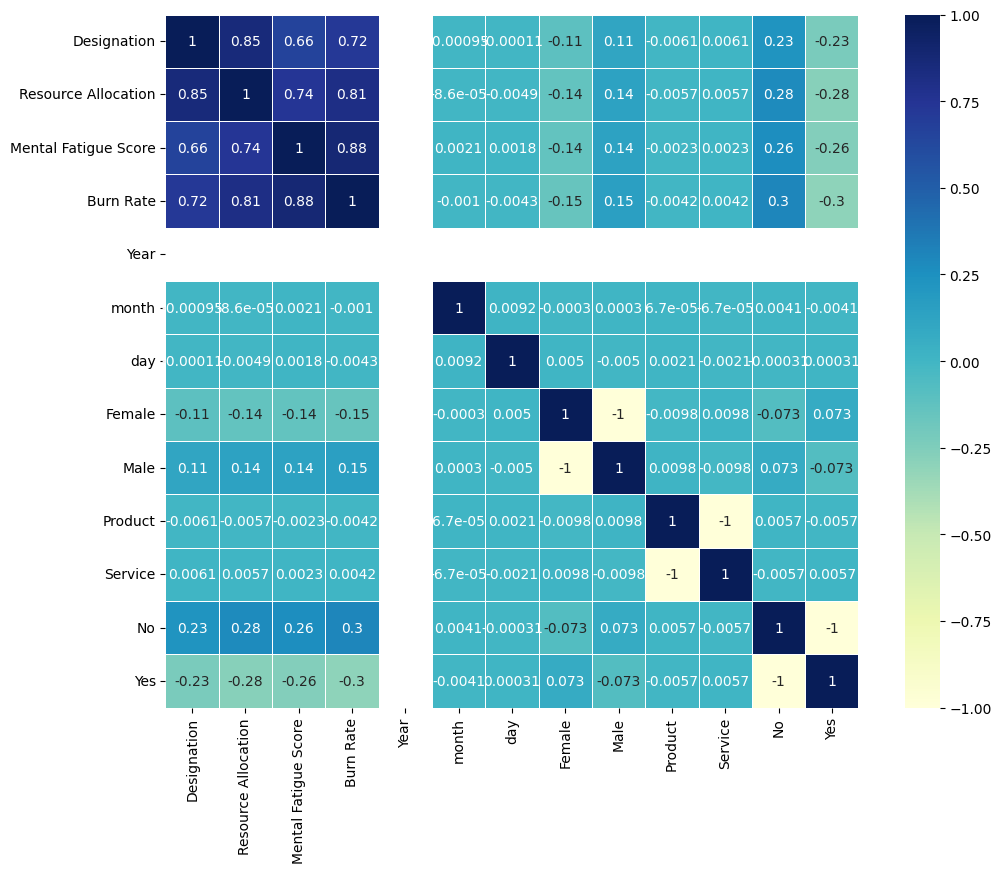

In [106]:
x,y = plt.subplots(figsize=(12,9))
sns.heatmap(employee_burnout.corr(),cmap='YlGnBu',square=True,linewidths=0.5,annot=True)
plt.show()

# Scaling

In [107]:
dum=pd.get_dummies(employee_burnout,drop_first=True)
dum.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day,Female,Male,Product,Service,No,Yes
0,2,3.000000,3.8,0.16,2008,9,30,1,0,0,1,1,0
1,1,2.000000,5.0,0.36,2008,11,30,0,1,0,1,0,1
2,2,4.481398,5.8,0.49,2008,3,10,1,0,1,0,0,1
3,1,1.000000,2.6,0.20,2008,11,3,0,1,0,1,0,1
4,3,7.000000,6.9,0.52,2008,7,24,1,0,0,1,1,0


In [108]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

dum= pd.DataFrame(standard_scaler.fit_transform(dum), columns=dum.columns)
print(dum.iloc[370])

Designation            -1.038415
Resource Allocation    -1.250670
Mental Fatigue Score   -0.133435
Burn Rate              -0.269092
Year                    0.000000
month                  -0.438896
day                     1.053631
Female                  0.954191
Male                   -0.954191
Product                 1.368782
Service                -1.368782
No                     -0.922550
Yes                     0.922550
Name: 370, dtype: float64


In [109]:
#cols = dum.shape[1]
#x1 = dum.iloc[:, list(range(3)) + list(range(4, 10))]
#y = dum.iloc[:,3]
cols = dum.shape[1]
x1 = dum.iloc[:, list(range(3)) + list(range(4, 10))]
y = dum.iloc[:,3]


In [110]:
x= np.matrix(x1.values)
y= np.matrix(y.values)
y= y.reshape(-1,1)

In [111]:
employee_burnout.isna().sum()

Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
Year                    0
month                   0
day                     0
Female                  0
Male                    0
Product                 0
Service                 0
No                      0
Yes                     0
dtype: int64

In [112]:
employee_burnout.dtypes

Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Year                      int64
month                     int64
day                       int64
Female                    uint8
Male                      uint8
Product                   uint8
Service                   uint8
No                        uint8
Yes                       uint8
dtype: object

In [113]:
employee_burnout.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Year,month,day,Female,Male,Product,Service,No,Yes
0,2,3.000000,3.8,0.16,2008,9,30,1,0,0,1,1,0
1,1,2.000000,5.0,0.36,2008,11,30,0,1,0,1,0,1
2,2,4.481398,5.8,0.49,2008,3,10,1,0,1,0,0,1
3,1,1.000000,2.6,0.20,2008,11,3,0,1,0,1,0,1
4,3,7.000000,6.9,0.52,2008,7,24,1,0,0,1,1,0


# Regression Model

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=33,shuffle=True)
print('x_train shape is : ',x_train.shape)
print('x_test shape is : ',x_test.shape)
print('y_train shape is : ',y_train.shape)
print('y_test shape is : ',y_test.shape)


x_train shape is :  (17062, 9)
x_test shape is :  (5688, 9)
y_train shape is :  (17062, 1)
y_test shape is :  (5688, 1)


In [115]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

variance_threshold = .001
selector = VarianceThreshold(threshold=variance_threshold)

x_train = np.asarray(x_train)
X_train_selected = selector.fit_transform(x_train)
X_test_selected = selector.transform(np.asarray(x_test))

In [116]:
y_train = np.asarray(y_train)
model = LinearRegression()
model.fit(np.asarray(X_train_selected), y_train)
y_pred = model.predict(np.asarray(X_test_selected))
print(y_pred )

[[ 0.05613008]
 [ 0.02215567]
 [-1.67388162]
 ...
 [-0.27378745]
 [-0.8497444 ]
 [-0.38649971]]


In [117]:
y_test = np.asarray(y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17040646944358626


In [118]:
score_test=model.score(X_test_selected  ,y_test)
print("test",score_test)
score_train=model.score(X_train_selected,y_train  )
print("train",score_train)

test 0.8247976094437031
train 0.8311156207889354


In [119]:
r2_value = r2_score(y_test, y_pred, multioutput='uniform_average')
print('r2_score Value is : ', r2_value)

r2_score Value is :  0.8247976094437031
